In [2]:
import sys
import os

# Caminho para a pasta acima (raiz do projeto)
project_root = os.path.abspath('..')
if project_root not in sys.path:
    sys.path.insert(0, project_root)
    
from lrfhss.run import *
import time
from joblib import Parallel, delayed
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pickle
import pandas as pd
from matplotlib.ticker import EngFormatter
import scienceplots
from lrfhss.fading import *
from lrfhss.traffic import *


# Rician_Fading

In [6]:
#Number of different number of nodes points (each simulation takes one different)
nNodes_points = 15
#Mininum amount of nodes
nNodes_min = 1000
#Maximum amount of nodes
nNodes_max = 150000
#Number of nodes is divided by 8, as we are simulating one of the 8 grid.
#As they are random selected, it is a very good approximation to consider one of them only, and it decreases the simulation time.
#In the end, we multiply this array by 8 if we want to consider the technology total capacity.
nNodes = np.linspace(nNodes_min, nNodes_max, nNodes_points, dtype=int)//8
#Number of simulation loops for each configuration.
loops = 25

start = time.perf_counter()
success_1 = []
goodput_1 = []
success_4 = []
goodput_4 = []
success_10 = []
goodput_10 = []
#For each number of nodes point, run the simulation "loops" times
for n in nNodes:
    #For each nNodes, create a new settings object with the proper input parameter
    m = 1
    k = np.sqrt((m**2)-m) / (m - np.sqrt((m**2)-m))
    s = Settings(number_nodes = n, fading_class=Rician_Fading,  fading_param = {"k" : k})
    #s = Settings(number_nodes = n, headers=2, code = '2/3', fading_class=No_Fading)
    #This line runs the simulation loops in paralel, using n_jobs as the number of threads generated.
    #Consider using a number according to the amount of reseources available to your machine to avoid crashing your system.
    results_1 = Parallel(n_jobs=8) (delayed(run_sim)(s, seed = seed) for seed in range(0,loops))
    #At the moment we only get the network outage probability as results and append the mean of the loops (for better accuracy) to a list.
    success_1.append(np.mean(results_1,0)[0][0])
    goodput_1.append(np.mean(results_1,0)[1][0])

    "***********************************"
    
    # #For each nNodes, create a new settings object with the proper input parameter
    # s = Settings(number_nodes = n, headers=2, code = '2/3', fading_class=Rician_Fading,  fading_param = {"k" : 4})
    # #This line runs the simulation loops in paralel, using n_jobs as the number of threads generated.
    # #Consider using a number according to the amount of reseources available to your machine to avoid crashing your system.
    # results_4 = Parallel(n_jobs=8) (delayed(run_sim)(s, seed = seed) for seed in range(0,loops))
    # #At the moment we only get the network outage probability as results and append the mean of the loops (for better accuracy) to a list.
    # success_4.append(np.mean(results_4,0)[0][0])
    # goodput_4.append(np.mean(results_4,0)[1][0])

    # # "***********************************"

    # #For each nNodes, create a new settings object with the proper input parameter
    # s = Settings(number_nodes = n, headers=2, code = '2/3', fading_class=Rician_Fading,  fading_param = {"k" : 10})
    # #This line runs the simulation loops in paralel, using n_jobs as the number of threads generated.
    # #Consider using a number according to the amount of reseources available to your machine to avoid crashing your system.
    # results_10 = Parallel(n_jobs=8) (delayed(run_sim)(s, seed = seed) for seed in range(0,loops))
    # #At the moment we only get the network outage probability as results and append the mean of the loops (for better accuracy) to a list.
    # success_10.append(np.mean(results_10,0)[0][0])
    # goodput_10.append(np.mean(results_10,0)[1][0])


    print(n*8)
    print(f"K = 1: Success: {success_1[-1]} - Goodput: {goodput_1[-1]}")
    #print(f"K = 4: Success: {success_4[-1]} - Goodput: {goodput_4[-1]}")
    #print(f"K = 10: Success: {success_10[-1]} - Goodput: {goodput_10[-1]}")
    
    print(f"The simulation lasted {time.perf_counter()-start} seconds.")

#Saving results on a file
#df = pd.DataFrame({'Success1': success_1, 'Goodput1': goodput_1, 'Success4': success_4, 'Goodput4': goodput_4, 'Success10': success_10, 'Goodput10': goodput_10}, index = nNodes)

df = pd.DataFrame({'Success1': success_1, 'Goodput1': goodput_1}, index = nNodes)
df.to_csv('testeRicem.csv', index=False)

#file = open('example_4.data', 'wb')
#pickle.dump(df, file)
#file.close()

1000
K = 1: Success: 0.9277348837797257 - Goodput: 4670.0
The simulation lasted 1.9129293999867514 seconds.
11640
K = 1: Success: 0.8858379137175518 - Goodput: 51407.6
The simulation lasted 24.19891049998114 seconds.
22280
K = 1: Success: 0.8286990664888195 - Goodput: 92078.0
The simulation lasted 65.13608379999641 seconds.
32928
K = 1: Success: 0.7517721703071559 - Goodput: 123219.6
The simulation lasted 141.7253201000276 seconds.
43568
K = 1: Success: 0.659284763807591 - Goodput: 143784.8
The simulation lasted 250.25574920000508 seconds.
54208
K = 1: Success: 0.5645331893318437 - Goodput: 152696.0
The simulation lasted 379.92956580000464 seconds.
64856
K = 1: Success: 0.46896316405898814 - Goodput: 151946.8
The simulation lasted 536.575498500024 seconds.
75496
K = 1: Success: 0.38093276674155446 - Goodput: 143466.8
The simulation lasted 739.0179379999754 seconds.
86136
K = 1: Success: 0.30166552143667913 - Goodput: 129562.4
The simulation lasted 964.2566824000096 seconds.
96784
K = 1

KeyboardInterrupt: 

# Nakagami_M_Fading

In [8]:
#Number of different number of nodes points (each simulation takes one different)
nNodes_points = 15
#Mininum amount of nodes
nNodes_min = 1000
#Maximum amount of nodes
nNodes_max = 150000
#Number of nodes is divided by 8, as we are simulating one of the 8 grid.
#As they are random selected, it is a very good approximation to consider one of them only, and it decreases the simulation time.
#In the end, we multiply this array by 8 if we want to consider the technology total capacity.
nNodes = np.linspace(nNodes_min, nNodes_max, nNodes_points, dtype=int)//8
#Number of simulation loops for each configuration.
loops = 25

start = time.perf_counter()
success_1 = []
goodput_1 = []
success_2 = []
goodput_2 = []
success_4 = []
goodput_4 = []
#For each number of nodes point, run the simulation "loops" times
for n in nNodes:
    #For each nNodes, create a new settings object with the proper input parameter
    #s = Settings(number_nodes = n, fading_class=Nakagami_M_Fading, fading_param = {"m" : 1})
    s = Settings(number_nodes = n, headers=2, code = '2/3', fading_class=Nakagami_M_Fading,  fading_param = {"m" : 1})
    #This line runs the simulation loops in paralel, using n_jobs as the number of threads generated.
    #Consider using a number according to the amount of reseources available to your machine to avoid crashing your system.
    results_1 = Parallel(n_jobs=8) (delayed(run_sim)(s, seed = seed) for seed in range(0,loops))
    #At the moment we only get the network outage probability as results and append the mean of the loops (for better accuracy) to a list.
    success_1.append(np.mean(results_1,0)[0][0])
    goodput_1.append(np.mean(results_1,0)[1][0])

    "***********************************"
    
    #For each nNodes, create a new settings object with the proper input parameter
    #s = Settings(number_nodes = n, fading_class=Nakagami_M_Fading,  fading_param = {"m" : 2})
    s = Settings(number_nodes = n, headers=2, code = '2/3', fading_class=Nakagami_M_Fading,  fading_param = {"m" : 2})
    #This line runs the simulation loops in paralel, using n_jobs as the number of threads generated.
    #Consider using a number according to the amount of reseources available to your machine to avoid crashing your system.
    results_2 = Parallel(n_jobs=8) (delayed(run_sim)(s, seed = seed) for seed in range(0,loops))
    #At the moment we only get the network outage probability as results and append the mean of the loops (for better accuracy) to a list.
    success_2.append(np.mean(results_2,0)[0][0])
    goodput_2.append(np.mean(results_2,0)[1][0])

    "***********************************"

    #For each nNodes, create a new settings object with the proper input parameter
    #s = Settings(number_nodes = n, fading_class=Nakagami_M_Fading,  fading_param = {"m" : 4})
    s = Settings(number_nodes = n, headers=2, code = '2/3', fading_class=Nakagami_M_Fading,  fading_param = {"m" : 4})
    #This line runs the simulation loops in paralel, using n_jobs as the number of threads generated.
    #Consider using a number according to the amount of reseources available to your machine to avoid crashing your system.
    results_4 = Parallel(n_jobs=8) (delayed(run_sim)(s, seed = seed) for seed in range(0,loops))
    #At the moment we only get the network outage probability as results and append the mean of the loops (for better accuracy) to a list.
    success_4.append(np.mean(results_4,0)[0][0])
    goodput_4.append(np.mean(results_4,0)[1][0])


    print(n*8)
    print(f"m = 1: Success: {success_1[-1]} - Goodput: {goodput_1[-1]}")
    print(f"m = 2: Success: {success_2[-1]} - Goodput: {goodput_2[-1]}")
    print(f"m = 4: Success: {success_4[-1]} - Goodput: {goodput_4[-1]}")
    
    print(f"The simulation lasted {time.perf_counter()-start} seconds.")
print(f"The simulation lasted {time.perf_counter()-start} seconds.")

#Saving results on a file

df = pd.DataFrame({'Success1': success_1, 'Goodput1': goodput_1, 'Success2': success_2, 'Goodput2': goodput_2, 'Success4': success_4, 'Goodput10': goodput_4}, index = nNodes)
df.to_csv('nakagamidr9v2.csv', index=False)

# df = pd.DataFrame({'Success': success, 'Goodput': goodput}, index = nNodes)
# file = open('example_5.data', 'wb')
# pickle.dump(df, file)
# file.close()

1000
m = 1: Success: 0.7955843986856047 - Goodput: 3962.4
m = 2: Success: 0.8754705701441465 - Goodput: 4359.6
m = 4: Success: 0.9204467419549768 - Goodput: 4583.2
The simulation lasted 9.688785600010306 seconds.
11640
m = 1: Success: 0.7262739869333216 - Goodput: 42392.8
m = 2: Success: 0.807759483685208 - Goodput: 47150.8
m = 4: Success: 0.8582980007553364 - Goodput: 50101.2
The simulation lasted 44.18524530006107 seconds.
22280
m = 1: Success: 0.6490181391825071 - Goodput: 72286.4
m = 2: Success: 0.7318510112976112 - Goodput: 81510.8
m = 4: Success: 0.781320079093782 - Goodput: 87021.2
The simulation lasted 119.97403050004505 seconds.
32928
m = 1: Success: 0.5701290786589485 - Goodput: 93740.8
m = 2: Success: 0.6471834638276289 - Goodput: 106410.4
m = 4: Success: 0.6943149738534826 - Goodput: 114159.2
The simulation lasted 220.17611850006506 seconds.
43568
m = 1: Success: 0.4908567861567857 - Goodput: 106811.2
m = 2: Success: 0.5605117354199555 - Goodput: 121967.6
m = 4: Success: 0.

# Plotting the examples

In [10]:
#In case you are only reading the files without runing the code, initialize the nNodes vector
nNodes_points = 15
nNodes_min = 1000
nNodes_max = 150000
nNodes = np.linspace(nNodes_min, nNodes_max, nNodes_points, dtype=int)//8

example_1 = pd.read_pickle('example_1.data')
example_3 = pd.read_pickle('example_3.data')
example_4 = pd.read_pickle('example_4.data')
example_5 = pd.read_pickle('example_5.data')
example_51 = pd.read_pickle('example_51.data')
example_52 = pd.read_pickle('example_52.data')

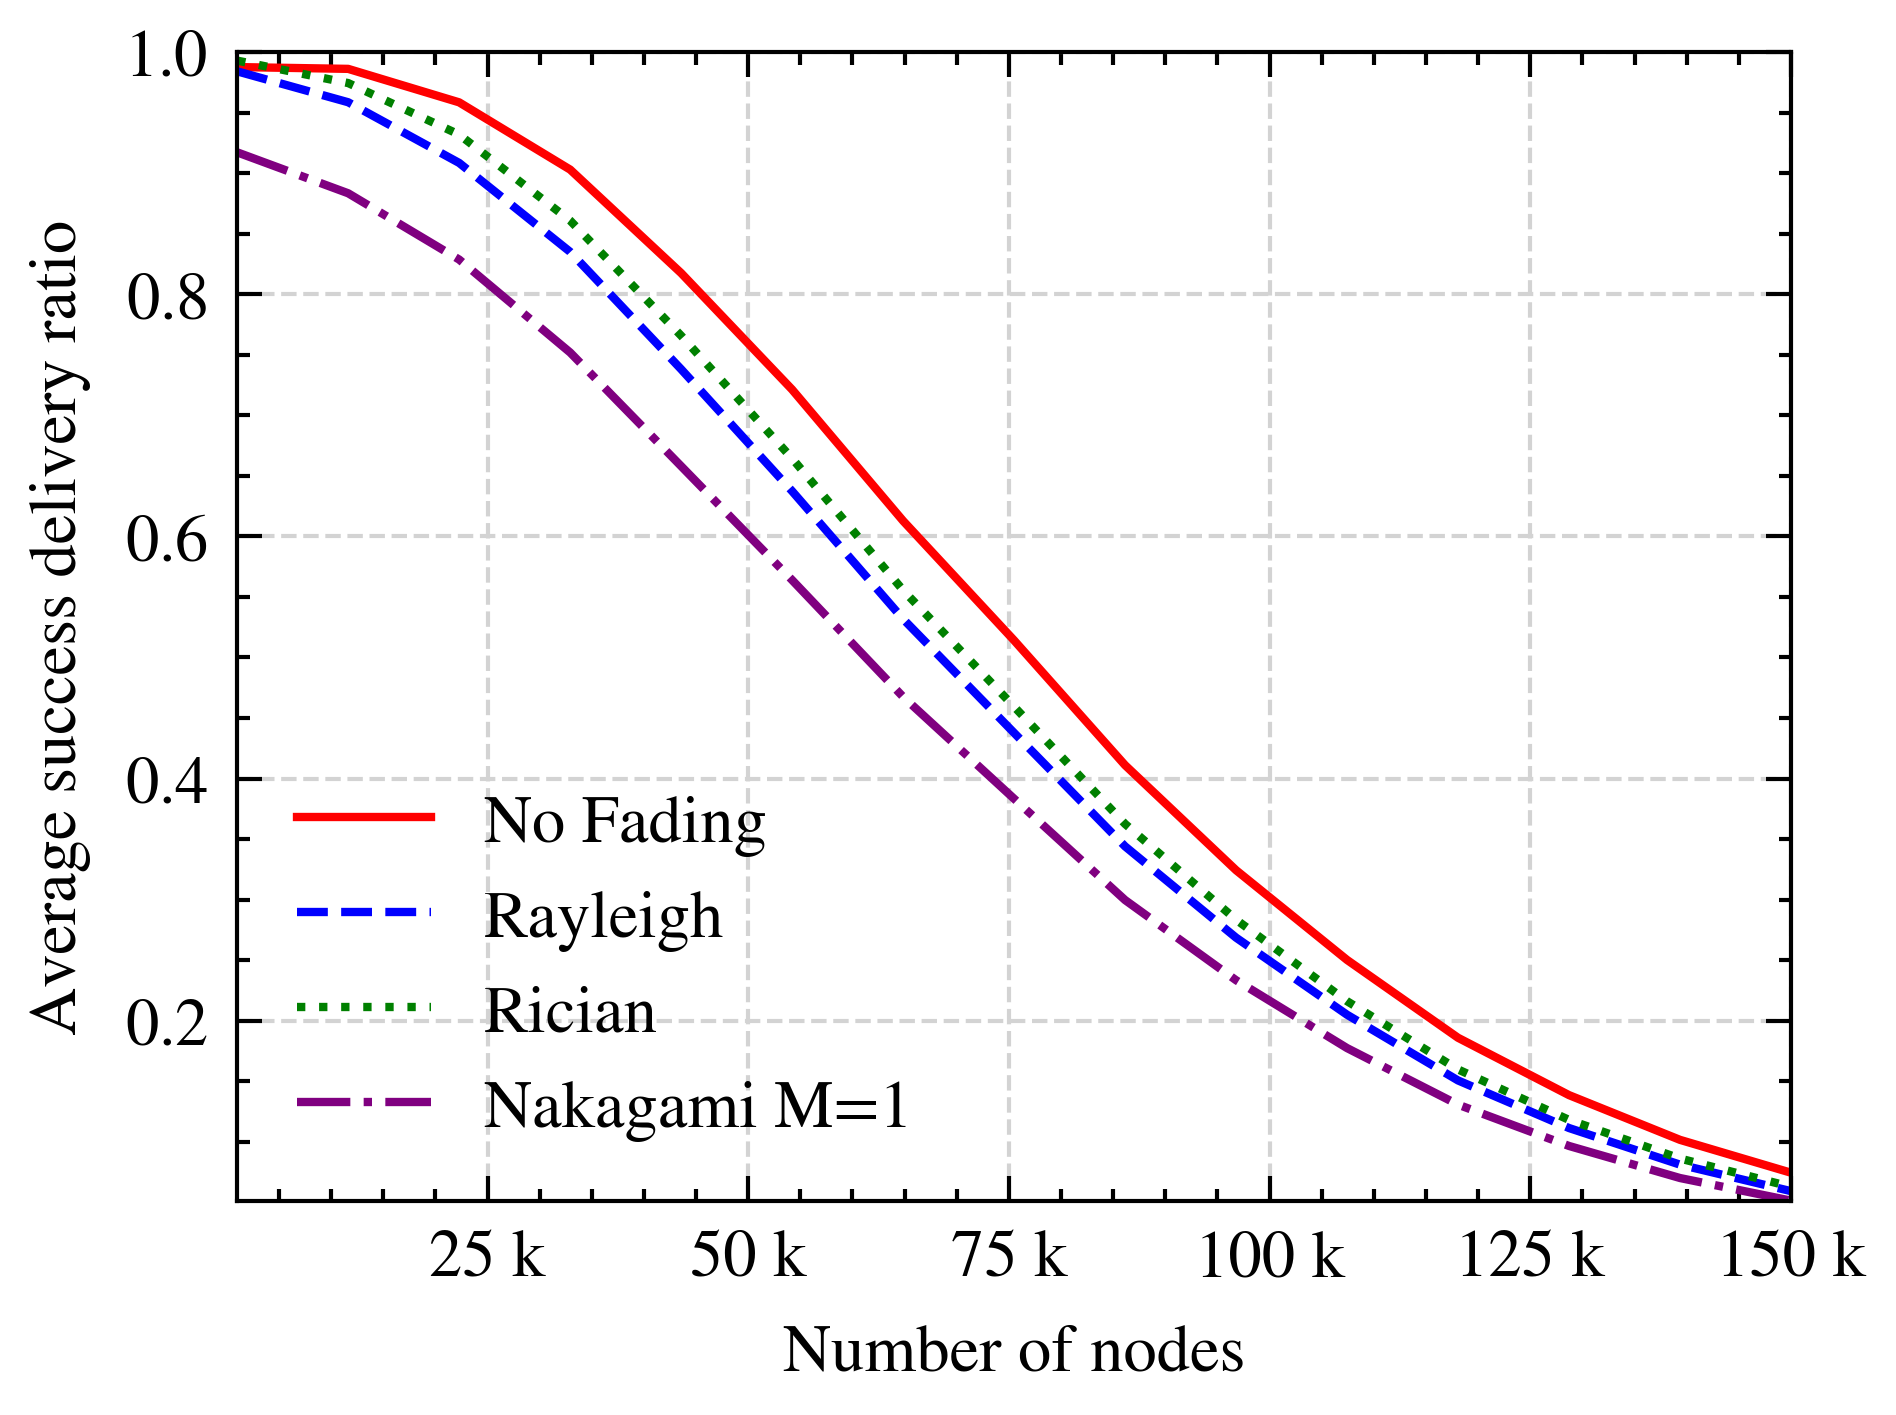

In [13]:
f_x = EngFormatter()
with plt.style.context(['science', 'ieee', 'no-latex']):
    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']
    pparam = dict(ylabel='Average success delivery ratio',xlabel='Number of nodes')
    fig, ax = plt.subplots()
    ax.xaxis.set_major_formatter(f_x)
    ax.plot(nNodes*8, example_1['Success'],color='red', label='No Fading')
    ax.plot(nNodes*8, example_3['Success'],color='blue', label='Rayleigh')
    ax.plot(nNodes*8, example_4['Success'],color='green', label='Rician')
    ax.plot(nNodes*8, example_5['Success'],color='purple', label='Nakagami M=1')
    #ax.plot(nNodes*8, example_51['Success'],color='blue', label='Nakagami M=2')
    #ax.plot(nNodes*8, example_52['Success'],color='green', label='Nakagami M=100')
    
    leg = ax.legend(loc=3)

    ax.grid(ls='--', color='lightgray')
    ax.autoscale(tight=True)
    ax.set(**pparam)
    ax.set_ylim(top=1)
    plt.tight_layout()
    plt.show()
    plt.close()